# What factors predict S&P500?
We focus on currencies. Do currency exchange rates contain information that can predict S&P500 returns? To predict, we use three machine learning models:

- Support Vector Machine
- Decision Tree Classifier
- Random Forest Classifier

We simulate different variations of how the models could be set set up to ultimately decide what 1) what model is the best one and 2) what factors potentially have the power to predict SP500 returns.

In [19]:
#Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import random
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#Import model and visualization functions
import sys 
sys.path.append('../src/models')
sys.path.append('../src/visualization')
sys.path.append('../src/data')
from support_vector_machine import support_vector_machine
from randomforest_classifier import randomforest_classifier
from decision_tree_classifier import decision_tree_classifier
from plot_results import plot_results
from combine_tables import combine_tables

#Import our data
log_returns_currencies = pd.read_csv("../data/processed/log_returns_currency_data.csv")
log_returns_spx = pd.read_csv("../data/processed/log_returns_spx_data.csv")
dataframe = pd.merge(log_returns_currencies, log_returns_spx.iloc[1:], on='DATE', how='inner')
print(dataframe)

            DATE   USDEUR   USDJPY   USDGBP   USDCHF   USDAUD   USDCAD  \
0     2000-01-04 -0.01505 -0.01358 -0.00613  0.01549  0.00441 -0.00366   
1     2000-01-05 -0.00252 -0.00657 -0.00275  0.00251  0.00183  0.00000   
2     2000-01-06  0.00106 -0.01359 -0.00365 -0.00090  0.00153 -0.00364   
3     2000-01-07  0.00291  0.00019  0.00554 -0.00533 -0.00122  0.00454   
4     2000-01-10  0.00409 -0.00105  0.00061 -0.00517 -0.00198 -0.00433   
...          ...      ...      ...      ...      ...      ...      ...   
5952  2023-11-17 -0.00258  0.00513 -0.00056  0.00135 -0.00463  0.00247   
5953  2023-11-20 -0.00605  0.01047 -0.00602  0.00327 -0.00965  0.00146   
5954  2023-11-21  0.00201  0.00257 -0.00279  0.00113 -0.00168  0.00219   
5955  2023-11-22  0.00477 -0.01203  0.00576 -0.00249  0.00504 -0.00314   
5956  2023-11-24 -0.00578  0.00067 -0.01061  0.00396 -0.00747  0.00914   

       USDNZD   USDSEK   USDSGD   USDNOK    SP500  
0     0.01072  0.00988  0.00169  0.00377 -0.03910  
1     0

In [20]:
?support_vector_machine

## Models
For our models, as mentioned above, we use Support Vector Machine, Decision Tree Classifier and Random Forest Classifier. The models are set up as functions in the src/models folder and imported here. As a short overview, we describe the three models here in short:

- Support vector machine (SVM): SVM finds a hyperplane that best separates the data into different classes. In a binary classification scenario, this hyperplane maximizes the margin between the two classes. SVM can also handle non-linear boundaries through the use of kernels.

- Decision Tree Classifier (DTC): The algorithm recursively splits the dataset based on features to create a tree-like structure. Each internal node represents a decision based on a feature, and each leaf node represents a class or a numerical value. Decision trees are interpretable and can capture non-linear relationships in the data.

- Random Forest Classifier (RFC): It constructs a forest of decision trees by training each tree on a random subset of the training data and using a random subset of features for each split. The final prediction is often a majority vote (classification) or an average (regression) of the individual tree predictions.

We tried to give the user as many possibilities regarding the model specification as possible. Therefore, the models are able to process countless different combinations of inputs. Hereafter, a short description of all model input parameters is given for every model. The same documentation can also be accessed by running "?functionname".

def support_vector_machine(dataframe, currencies=None, include_sp500=True,lag=1, train_size=0.75, random_seed=False, long_only=False):
   - dataframe (pd.DataFrame): The dataset containing the financial data. It should have a 'DATE' column, currency data columns, and optionally a 'SP500' column.
   - currencies (list of str, optional): A list of currency columns to include in the analysis. If None, all available currencies in the dataframe will be used.
   - include_sp500 (bool): Determines whether to include information from the S&P 500 data in the analysis. Defaults to True.
   - lag (int): The number of periods by which to lag the response variable for prediction. Defaults to 1.
   - train_size (float): The proportion of the dataset to use for training the model. The rest will be used for testing. Defaults to 0.75.

def decision_tree_classifier(dataframe, currencies=None, include_sp500=True, lag=1, train_size=0.75, random_seed=False, long_only=False, max_depth=10):
   - dataframe (pd.DataFrame): The dataset containing the financial data. It should have a 'DATE' column, currency data columns, and optionally an 'SP500' column.
   - currencies (list of str, optional): List of currency columns to include in the analysis. If None, all available currencies in the dataframe will be used.
   - include_sp500 (bool): Determines whether to include the S&P 500 data in the analysis. Defaults to True.
   - lag (int): The number of periods by which to lag the response variable for prediction. Defaults to 1.
   - train_size (float): The proportion of the dataset to use for training the model. The rest will be used for testing. Defaults to 0.75.
   - max_depth (int): The maximum depth of the decision tree. Helps to control the complexity of the model. Defaults to 10.
   
def randomforest_classifier(dataframe, currencies=None, include_sp500=True, lag=1, train_size=0.75, random_seed=False, long_only=False, trees=30, max_depth=10, leaves=10):
   - dataframe (pd.DataFrame): The dataset containing the financial data. It should have a 'DATE' column, currency data columns, and optionally an 'SP500' column.
   - currencies (list of str, optional): List of currency columns to include in the analysis. If None, all available currencies in the dataframe will be used.
   - include_sp500 (bool): Determines whether to include the S&P 500 data in the analysis. Defaults to True.
   - lag (int): The number of periods by which to lag the response variable for prediction. Defaults to 1.
   - train_size (float): The proportion of the dataset to use for training the model. The rest will be used for testing. Defaults to 0.75.
   - trees (int): The number of trees in the forest. More trees can lead to a more robust and stable model, but it also comes with increased computational cost. Default is 30.
   - max_depth (int): The maximum depth of one decision tree in the forest. Helps to control the complexity of the model. Defaults to 10.
   - leaves (int): The maximum number of terminal nodes / leaves in one tree. Helps to control the complexity of the model. Defaults to 10.

In [4]:
#Select the number of days lag for our models
lag = 1
#Select the size of the training dataset (%)
train_size = 0.8
#Set a seed
seed = 42
#Specify which currencies to use in the analysis
currencies = ['USDEUR', 'USDJPY', 'USDGBP', 'USDCHF', 'USDAUD', 'USDCAD', 
              'USDNZD', 'USDSEK', 'USDSGD', 'USDNOK']
#Choose whether S&P 500 should be used as a regressor variable
include_sp500 = False
#Should the strategy be long only?
long_only = False

In [22]:
#Train the models and print their accuracies
svm_accuracies, svm_results = support_vector_machine(dataframe, currencies, include_sp500, lag, train_size, 2, long_only)
print(svm_results)

            DATE     SP500       SVC
4765  2019-02-11  0.000710  0.000710
4766  2019-02-12  0.013603  0.013603
4767  2019-02-13  0.016627  0.016627
4768  2019-02-14  0.013971  0.013971
4769  2019-02-15  0.024849  0.024849
...          ...       ...       ...
5952  2023-11-17  0.565987  0.775730
5953  2023-11-20  0.573374  0.783117
5954  2023-11-21  0.571356  0.781099
5955  2023-11-22  0.575414  0.785157
5956  2023-11-24  0.576014  0.785758

[1192 rows x 3 columns]


In [6]:
dt_accuracies, dt_results = decision_tree_classifier(dataframe, currencies, include_sp500, lag, train_size, seed, long_only)

In [7]:
rf_accuracies, rf_results = randomforest_classifier(dataframe, currencies, include_sp500, lag, train_size, seed, long_only)

### Plot these results

In [8]:
results = combine_tables([svm_results, dt_results, rf_results])
results['DATE'] = pd.to_datetime(results['DATE'], format='%Y-%m-%d')

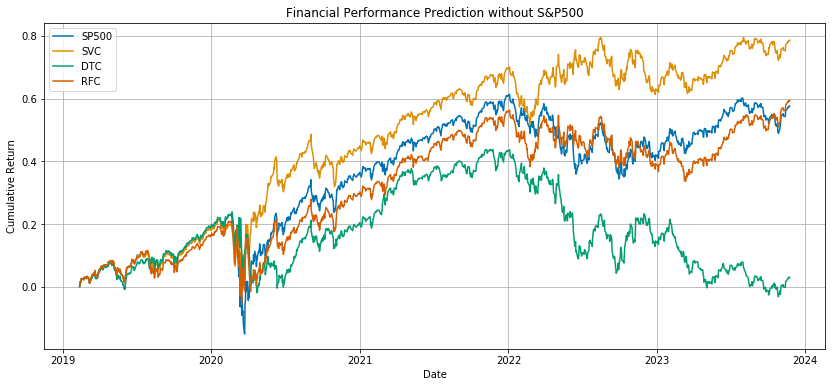

In [9]:
plot_results(results, include_sp500)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


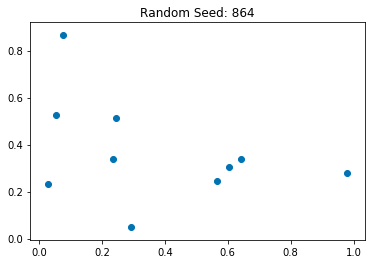

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Replace this with your actual function
def your_function(seed):
    # Your function logic here
    # For example, let's create a scatter plot with random points
    x = np.random.rand(10)
    y = np.random.rand(10)
    plt.scatter(x, y)
    plt.title(f"Random Seed: {seed}")

# Number of iterations (different random seeds)
num_iterations = 10

# Create a figure
fig, ax = plt.subplots()

# Function to update the plot for each iteration
def update(frame):
    ax.clear()
    seed = random.randint(0, 4294967295)
    your_function(seed)

# Create the animation
animation = FuncAnimation(fig, update, frames=num_iterations, repeat=False)
# Save the animation as a GIF file
animation.save('animation.gif', writer='imagemagick')
# Display the animation in the notebook
from IPython.display import HTML
HTML(animation.to_jshtml())  # You can also use to_html5_video() for a video-based animation


In [15]:
?support_vector_machine

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


881
            DATE     SP500       SVC
4765  2019-02-11  0.000710  0.000710
4766  2019-02-12  0.013603  0.013603
4767  2019-02-13  0.016627  0.016627
4768  2019-02-14  0.013971  0.013971
4769  2019-02-15  0.024849  0.024849
...          ...       ...       ...
5952  2023-11-17  0.565987  0.775730
5953  2023-11-20  0.573374  0.783117
5954  2023-11-21  0.571356  0.781099
5955  2023-11-22  0.575414  0.785157
5956  2023-11-24  0.576014  0.785758

[1192 rows x 3 columns]
            DATE     SP500       SVC       DTC       RFC
0     2019-02-11  0.000710  0.000710  0.000710  0.000710
1     2019-02-12  0.013603  0.013603  0.013603  0.013603
2     2019-02-13  0.016627  0.016627  0.016627  0.016627
3     2019-02-14  0.013971  0.013971  0.013971  0.013971
4     2019-02-15  0.024849  0.024849  0.024849  0.024849
...          ...       ...       ...       ...       ...
1187  2023-11-17  0.565987  0.775730  0.107320  0.642296
1188  2023-11-20  0.573374  0.783117  0.114707  0.649683
1189  2023-11-

477
            DATE     SP500       SVC
4765  2019-02-11  0.000710  0.000710
4766  2019-02-12  0.013603  0.013603
4767  2019-02-13  0.016627  0.016627
4768  2019-02-14  0.013971  0.013971
4769  2019-02-15  0.024849  0.024849
...          ...       ...       ...
5952  2023-11-17  0.565987  0.775730
5953  2023-11-20  0.573374  0.783117
5954  2023-11-21  0.571356  0.781099
5955  2023-11-22  0.575414  0.785157
5956  2023-11-24  0.576014  0.785758

[1192 rows x 3 columns]
            DATE     SP500       SVC       DTC       RFC
0     2019-02-11  0.000710  0.000710  0.000710  0.000710
1     2019-02-12  0.013603  0.013603  0.013603  0.013603
2     2019-02-13  0.016627  0.016627  0.016627  0.016627
3     2019-02-14  0.013971  0.013971  0.013971  0.013971
4     2019-02-15  0.024849  0.024849  0.024849  0.024849
...          ...       ...       ...       ...       ...
1187  2023-11-17  0.565987  0.775730 -0.007192  0.961726
1188  2023-11-20  0.573374  0.783117  0.000195  0.969113
1189  2023-11-

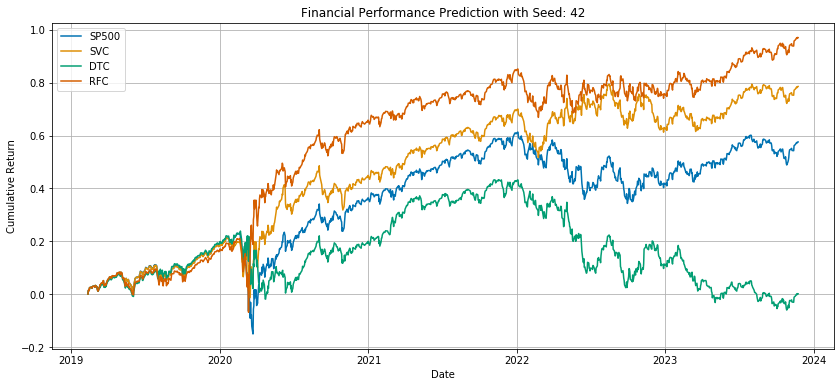

In [18]:
# Number of iterations (different random seeds)
num_iterations = 2

# Create a figure
fig, ax = plt.subplots(figsize=(14, 6))
# Replace this with your actual function
def function_to_update(seed1):
    print(seed1)
    svm_accuracies, svm_results = support_vector_machine(dataframe, currencies, include_sp500, lag, train_size, seed1, long_only)
    print(svm_results)
    dt_accuracies, dt_results = decision_tree_classifier(dataframe, currencies, include_sp500, lag, train_size, seed1, long_only)
    rf_accuracies, rf_results = randomforest_classifier(dataframe, currencies, include_sp500, lag, train_size, seed1, long_only)
    results = combine_tables([svm_results, dt_results, rf_results])
    print(results)
    results['DATE'] = pd.to_datetime(results['DATE'], format='%Y-%m-%d')
    # starting from here is reused from the function: plot_results
    cols = results.shape[1]
    # Set the Seaborn color palette
    sns.set_palette("colorblind")
    for i in range(1, cols):
        plt.plot(results["DATE"], results.iloc[:,i], label= results.columns[i])
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.legend()
    plt.title(f"Financial Performance Prediction with Seed: {seed}")
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)

def update(frame):
    ax.clear()
    seed1 = random.randint(0, 1000)
    function_to_update(seed1)

# Create the animation
animation = FuncAnimation(fig, update, frames=num_iterations, repeat=False)

# Save the animation as a GIF file
animation.save('financial_performance_animation.gif', writer='imagemagick')

# Display the animation in the notebook
HTML(animation.to_jshtml())

Functions need to be redefined (random_seed) for all three models. As one can see, the results look completely random. Check look ahead bias. What is compared to what in the model? How is the lag introduced? Doesnt make sense now.
Run a simulation where the seed is drawed randomly. Get averages (in-sample error, out of sample error), show average performance. For randomforest and decisiontree, we could also do hyperparameter training (split data in training, validation and test sets). Make different plots from the output of the model.

In [ ]:
# run a simulation (might have to load over night)
# save, apart from the SP500, every realization in a separate column
# then visualize every path, make SP500 path red and also the 95% intervals
# for every model. then compare the models with each other